<a href="https://colab.research.google.com/github/Nik8x/Deep_writing_generating_text/blob/master/Deep_Writing_with_sentence_prediction_big_document-tpu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import regex as re

import nltk
from nltk.draw.dispersion import dispersion_plot
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.probability import FreqDist
from textblob import TextBlob
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
nltk.download('averaged_perceptron_tagger')
from nltk.util import ngrams
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.utils import np_utils
from keras.callbacks import EarlyStopping

from keras.preprocessing.text import Tokenizer
from keras.utils.np_utils import to_categorical

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Embedding

from keras.preprocessing.text import Tokenizer
from keras.utils.np_utils import to_categorical

import urllib

import os

# Any results you write to the current directory are saved as output.
# from google.colab import drive
# drive.mount('/content/gdrive')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "
Using TensorFlow backend.


In [2]:
text = urllib.request.urlopen('http://www.textfiles.com/stories/3gables.txt').read().decode('utf8')
text = text.replace('\n', ' ').replace('\r', '').replace("\'", "").replace('\w+', '')[348:5000]
text[0:1000]

'   I dont think that any of my adventures with Mr. Sherlock Holmes opened quite so abruptly, or so dramatically, as that which I associate with The Three Gables. I had not seen Holmes for some days and had no idea of the new channel into which his activities had been directed. He was in a chatty mood that morning, however, and had just settled me into the well-worn low armchair on one side of the fire, while he had curled down with his pipe in his mouth upon the opposite chair, when our visitor arrived. If I had said that a mad bull had arrived it would give a clearer impression of what occurred.   The door had flown open and a huge negro had burst into the room. He would have been a comic figure if he had not been terrific, for he was dressed in a very loud gray check suit with a flowing salmon-coloured tie. His broad face and flattened nose were thrust forward, as his sullen dark eyes, with a smouldering gleam of malice in them, turned from one of us to the other.   "Which of you ge

In [0]:
# I will first convert all the words to numbers, then normalize them, then make a dataframe with two columns, 
# one with sentences(one word, then two words, and so on), the other with the exact next word

In [0]:
# integer encode text
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
encoded = tokenizer.texts_to_sequences([text])[0]

In [5]:
# determine the vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)

Vocabulary Size: 376


In [0]:
# x = pd.DataFrame(pd.Series([encoded[:i] for i in range(len(encoded))]))
# x['label'] = pd.DataFrame([i for i in encoded])
# x.head()

In [7]:
type(encoded)

list

In [0]:
def n_gram(x, ng):
  tokens = [token for token in x]
  output = list(ngrams(tokens, ng))
  output = list(map(list, output)) #  function to convert a list of tuples to a list of lists
  return output

In [0]:
n2d = pd.DataFrame([pd.Series(n_gram(encoded, 2)).apply(lambda i: [i[0:1][0]]), pd.Series(n_gram(encoded, 2)).apply(lambda i: i[-1])]).T
n3d = pd.DataFrame([pd.Series(n_gram(encoded, 3)).apply(lambda i: i[0:2]), pd.Series(n_gram(encoded, 3)).apply(lambda i: i[-1])]).T
n4d = pd.DataFrame([pd.Series(n_gram(encoded, 4)).apply(lambda i: i[0:3]), pd.Series(n_gram(encoded, 4)).apply(lambda i: i[-1])]).T
n5d = pd.DataFrame([pd.Series(n_gram(encoded, 5)).apply(lambda i: i[0:4]), pd.Series(n_gram(encoded, 5)).apply(lambda i: i[-1])]).T
n6d = pd.DataFrame([pd.Series(n_gram(encoded, 6)).apply(lambda i: i[0:5]), pd.Series(n_gram(encoded, 6)).apply(lambda i: i[-1])]).T

In [10]:
n2d.shape, n3d.shape, n4d.shape, n5d.shape, n6d.shape

((879, 2), (878, 2), (877, 2), (876, 2), (875, 2))

In [11]:
df = pd.concat([n2d, n3d, n4d, n5d, n6d], axis = 0)
df.head()

,0,1
0,[3],30
1,[30],122
2,[122],16
3,[16],40
4,[40],5


In [0]:
listy = []
for i in df[0]:
  listy.append(i)

In [13]:
length = len(sorted(listy[1:], key = len, reverse = True)[0])   # creating array by adding 0 to make all rows equal
X = np.array([xi + [0] * (length - len(xi)) for xi in listy[1:]])
X.shape  # creating X array

(4384, 5)

In [14]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [15]:
X[0]

array([-0.60503664, -0.73372717, -0.59658788, -0.46017321, -0.30950734])

In [16]:
y = [i for i in df[1]][1:] # creating y array
len(y)

4384

In [0]:
# one hot encode outputs
y = to_categorical(y, num_classes = vocab_size)

In [18]:
y[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [19]:
X.shape, y.shape

((4384, 5), (4384, 376))

In [20]:
# LSTMs accept input in the form of (number_of_sequences, length_of_sequence, number_of_features)
X_lstm = np.reshape(X, (X.shape[0], X.shape[1], 1))
X_lstm.shape

(4384, 5, 1)

In [21]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(500, input_shape = (X_lstm.shape[1], X_lstm.shape[2]), return_sequences = True))
model.add(tf.keras.layers.Dropout(0.2))
# model.add(tf.keras.layers.LSTM(50, return_sequences = True))
# model.add(tf.keras.layers.Dropout(0.2))
# model.add(tf.keras.layers.LSTM(500, return_sequences = True))
# model.add(tf.keras.layers.Dropout(0.2))
# model.add(tf.keras.layers.LSTM(500, return_sequences = True))
# model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(500, return_sequences = True))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(250))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(y.shape[1], activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 5, 500)            1004000   
_________________________________________________________________
dropout (Dropout)            (None, 5, 500)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 5, 500)            2002000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 500)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 250)               751000    
_________________________________________________________________
dropout_2 (Dropout)  

In [22]:
TPU_WORKER = 'grpc://' + os.environ['COLAB_TPU_ADDR']
tf.logging.set_verbosity(tf.logging.INFO)

tpu_model = tf.contrib.tpu.keras_to_tpu_model(
    model,
    strategy=tf.contrib.tpu.TPUDistributionStrategy(
        tf.contrib.cluster_resolver.TPUClusterResolver(TPU_WORKER)))


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

INFO:tensorflow:Querying Tensorflow master (grpc://10.83.235.122:8470) for TPU system metadata.
INFO:tensorflow:Found TPU system:
INFO:tensorflow:*** Num TPU Cores: 8
INFO:tensorflow:*** Num TPU Workers: 1
INFO:tensorflow:*** Num TPU Cores Per Worker: 8
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, -1, 4215553218084301604)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 17179869184, 12159045724826873049)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 17179869184, 17715069662559877677)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU

In [23]:
tpu_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_input (InputLayer)      (None, 5, 1)              0         
_________________________________________________________________
lstm (LSTM)                  (None, 5, 500)            1004000   
_________________________________________________________________
dropout (Dropout)            (None, 5, 500)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 5, 500)            2002000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 500)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 250)               751000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 250)               0         
__________

In [25]:
#early_stopping_monitor = EarlyStopping(monitor = 'loss', patience = 4, verbose = 0, mode='auto')
tpu_model.fit(X_lstm, y, epochs = 500, batch_size = 50)#, callbacks = [early_stopping_monitor])

Epoch 1/500
INFO:tensorflow:New input shapes; (re-)compiling: mode=train (# of cores 8), [TensorSpec(shape=(6,), dtype=tf.int32, name='core_id0'), TensorSpec(shape=(6, 5, 1), dtype=tf.float32, name='lstm_input_10'), TensorSpec(shape=(6, 376), dtype=tf.float32, name='dense_target_30')]
INFO:tensorflow:Overriding default placeholder.
INFO:tensorflow:Cloning Adam {'lr': 0.0010000000474974513, 'beta_1': 0.8999999761581421, 'beta_2': 0.9990000128746033, 'decay': 0.0, 'epsilon': 1e-07, 'amsgrad': False}
INFO:tensorflow:Remapping placeholder for lstm_input
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:KerasCrossShard: <tensorflow.python.keras.optimizers.Adam object at 0x7f03ebe11240> []
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Started compiling
INFO:tensorflow:Finished compiling. Time elapsed: 9.280632257461548 secs
INFO:tensorflow:Setting weights on TPU model.
INFO:tensorflow:CPU -> TPU lr: 0.0010000000474974513 {0.001}
INFO:tensorflow:CPU -> TPU beta

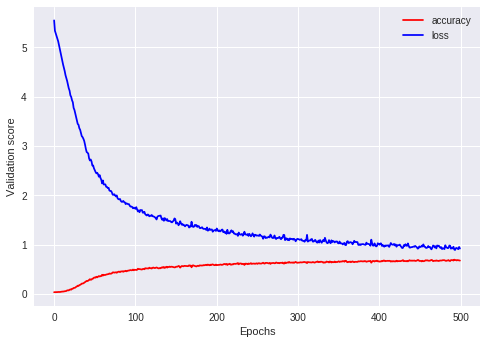

In [28]:
# Create the plot
plt.plot(tpu_model.history.history['acc'], 'r', label = 'accuracy')
plt.plot(tpu_model.history.history['loss'], 'b', label = 'loss')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.legend()
plt.show()

In [29]:
cpu_model = tpu_model.sync_to_cpu()

INFO:tensorflow:Copying TPU weights to the CPU
INFO:tensorflow:TPU -> CPU lr: 0.0010000000474974513
INFO:tensorflow:TPU -> CPU beta_1: 0.8999999761581421
INFO:tensorflow:TPU -> CPU beta_2: 0.9990000128746033
INFO:tensorflow:TPU -> CPU decay: 0.0
INFO:tensorflow:TPU -> CPU epsilon: 1e-07
INFO:tensorflow:TPU -> CPU amsgrad: False


In [0]:
cpu_model.save_weights('Deep_Writing_with_sentence_prediction_big_document-tpu.h5')

In [0]:
cpu_model.load_weights('Deep_Writing_with_sentence_prediction_big_document-tpu.h5')

In [32]:
X[9]

array([ 0.26090802, -0.73372717, -0.59658788, -0.46017321, -0.30950734])

In [33]:
X_lstm[0:10].shape

(10, 5, 1)

In [36]:
pred = cpu_model.predict(X_lstm[0:])
print(pred.shape)
line = []
for i in range(len(pred)):
  line.append(tokenizer.index_word[np.argmax(pred[i])])
  
generated_text = ' '.join(line)

(4384, 376)


In [38]:
generated_text

'i that masser case the adventures with a to quite i quite quite he quite aint he as the masser i want with a room i i want not friend sent i he aint and had not the and the room and and the i pipe he not the he had holmes birmingham huge that however masser however me had not days low i the room holmes armchair armchair armchair visitor of of the room while he had not opposite of a pipe with birmingham pipe he opposite room bull bull i of with he he want not he masser huge bull he not he is if ring huge door door the ere door room door not door open had huge had knotted not if the room had had if been the huge had if he had not friend the if he had holmes loud birmingham huge loud in gray suit suit a huge salmon tie tie his pipe his almost had his interlude with forward as the pipe as as eyes a huge gleam in the in birmingham you in in of the one meet room holmes i the up to it holmes i had holmes i to pipe with a huge one smile holmes fine up it is he of with oh a its oh pleasant the

i that masser case the adventures with a to quite i quite quite he quite aint he as the masser i want with a room i i want not friend sent i he aint and had not the and the room and and the i pipe he not the he had holmes birmingham huge that however masser however me had not days low i the room holmes armchair armchair armchair visitor of of the room while he had not opposite of a pipe with birmingham pipe he opposite room bull bull i of with he he want not he masser huge bull he not he is if ring huge door door the ere door room door not door open had huge had knotted not if the room had had if been the huge had if he had not friend the if he had holmes loud birmingham huge loud in gray suit suit a huge salmon tie tie his pipe his almost had his interlude with forward as the pipe as as eyes a huge gleam in the in birmingham you in in of the one meet room holmes i the up to it holmes i had holmes i to pipe with a huge one smile holmes fine up it is he of with oh a its oh pleasant the the the room angle the room angle here here holmes i up on fine angle of the holmes that angle ness ness that meet their affairs affairs affairs that masser holmes i on visitor savage he i fine seen holmes fine seen it is savage room savage is fine when he fine seen he want been meet ive up when huge ive the your fine your look look had listen look didnt seen i want holmes that a you didnt the masser holmes i had lump huge had lump of the huge of of adventures nose interlude i of is of a its of the by of with up of he had holmes aint of is by in of is have been the room of of the adventures in aint is have been the room of up i want up the want up when room our birmingham case our of our less less less less holmes the less up well warnin he had the huge in the meaning of have either up way ere meaning meaning had had i meaning meet been the meaning birmingham in up that masser up the room either had want the room either in had he up by birmingham pick when visitor also also i up to is the to meet to up he aint pick he i want fine to up meet you of he want i smell room you the up arent you up way you room you the adventures you holmes i had outside dixie through that is he through he up ring i case through is it if room thing thing up thing he i said the of our said he arent is holmes room said the mouth outside perkins room bar what ere what friend negro room knotted not not of had pipe almost holmes not want fine not meet the talk talk he had ere been want meet of a ere gone outside holmes i want holmes talk the room he at birmingham when i ere when gone gone dixie the there about outside the room about you is way he i the the you up had there you he you i room you holmes i the masser dixie of the is pick masser up when i want you up masser masser holmes i want masser aint the the masser there you ere gone there aint there when there up the i to you up there aint the the you you masser holmes i is holmes masser you you masser up been days gone gone you had to you down visitor meet is genlman i want i way holmes i had days genlman way up that here to i had the down pipe him the him he had that of have either the room aint aint aint truth he case truth questioning of with questioning of the room had out the as the had not out i out of room out the pipe with a huge out chuckle want glad glad up with friend glad meet his pipe watson head your want your fine your a room our arent had it a a huge a a huge by foolish foolish baby and john had john gang the up been sent had it of the room gang gang part had work work work birmingham aint which which the barney i want have barney when i want been pick pipe barney barney there it huge person person intimidation listen intimidation birmingham occasion you had room smell ere want you meet way it to it the room of the you visitor ere you you arent there of listen you meet you up is it ere have me our is me i meet didnt the room me he he is it while while he meet here he here there aint here when here birmingham is arent ere it is want holmes negro meet the up i here not ere had here here know that any of my friend with mr is holmes opened quite so that as so who as that which i may with three a channel i new said seen holmes and some days and had no such of new the channel that which his activities had been directed he was in same chatty mood that morning however and had no settled me into the matter worn opposite armchair armchair one side of fire the while he had entered down with his pipe with his mouth sherlock opposite opposite chair when our the bolted if i is said that a mad impression had arrived it would give a clearer impression of what occurred the door had flown into and huge huge knotted a burst into room matter almost would have been the look knotted if he had entered seen terrific for he go in in very chatty loud gray check suit suit a languid salmon tie tie tie broad face were would nose were thrust forward as his which dark as with smouldering languid gleam of malice in them with with one of the to other take which of you genlmen is pipe holmes he swung or raised his pipe with his languid smile oh its thrust born it said our visitor bolted with pipe un pleasant step step step angle angle see table the see here masser holmes he keep your hands out of the folks busi ness leave leave to manage their affairs affairs affairs that holmes holmes he on talking said holmes its fine oh its thrust oh it said the up it wont have oh i fine if terrific is time trim you up me bit ive handled your kind before now now they didnt look fine that i want trainin with them look way that masser holmes he swung a huge knotted lump of a fist under of friends nose holmes raised it closely with an un of great by were you born so he had or did it great by degrees it my said been the slight coolness of my friend or it may said been the slight coolness which i may up i picked up the poker in any case our he manner became less less well ive given you fair warnin well he what a friend thats it out harrow way you know dixie im meaning dont if dont intend to have no buttin in by you got in holmes aint arent law and i aint the law and and if you give in ill be on hand also dont you associate it ive what to meet down for some days said holmes its was ask you for sit down for i dont know the smell of you genlmen arent you steve dixie the steve thats my name masser holmes he youll get put through it for sure if you give me any lip masser is certainly the last said you need said holmes its at our hand manner mouth but it was that killing bar young perkins outside the holborn bar what youre not going the negro almost burst back and tell face was leaden i wont ask to no such talk said he what intend i to do with this ere visit masser holmes he was trainin at the bull ring in birmingham when this boy done tell mention into of yes youll tell magistrate whole about it steve said holmes its friend watching you and barney stockdale so help me help lord mornin holmes he enough get it of the ill pick you up me i want good good there masser holmes he was there aint no hard feelins masser out ere visit there aint be unless you tell me i sent you why see must no hard about this holmes holmes he was that same genlman that you aint seen done his mention and who set him on to it selp me i was know masser holmes he swung say steve you go see mr holmes and youll him his any aint safe if you had down harrow way you whole bull truth without without waiting any further questioning our safe bolted out of the the almost as he as he look entered holmes knocked out the ashes of knocked pipe with his languid chuckle you am glad i were not forced to break his woolly head i i observed your manoeuvres with the a in he is one rather a harmless fellow a harmless muscular foolish blus blus blus blus easily taken and have have seen he is one settled the the john and and has taken in of some dirty work of late which i may clear up when i want time his immediate principal barney is life more astute barney they specialize case assaults intimidation but the had what i want good intimidate is who is at the bull of them on this panicular occasion but why with they want to intimidate you you is certainly harrow masser case it decides me much look into the matter for if it is certainly anyones while to take so much trouble there must be something in this but what is it said was trainin to tell say when we had this comic interlude here is that any of my adventures with mr sherlock holmes opened quite so abruptly or so dramatically as that which i associate with three three gables into had not seen holmes for some days and had no idea of new new channel into which his activities had been directed he was in a chatty mood that morning however and had just settled me into well the worn low armchair on one side of the fire while he had one down with his pipe in his mouth upon the opposite chair when our visitor arrived if i had said that a mad loud had arrived it would give a clearer impression of what occurred the door had flown open and a huge negro had burst into the room he sprung have been a comic figure if he was not been terrific for he was dressed in a very salmon coloured check check suit a flowing gleam coloured his his broad face and flattened nose were thrust forward as his sullen dark eyes with a smouldering smile of malice in them turned from one of us to the other which of you genlmen is masser holmes he swung holmes raised his pipe with his languid smile oh its you is it said our visitor coming with an un pleasant stealthy step step angle angle of table table see here masser holmes you keep your hands out of other folks busi ness leave folks to manage their own affairs affairs that masser holmes he on talking said holmes its fine oh its fine is it growled savage savage it wont be so damn fine if i have to trim you up a bit ive handled your kind before now and they didnt look fine when i was time with them look at that masser holmes he swung a huge knotted lump of a fist under my friends nose holmes examined it closely with an air of great interest were you born so he asked or did it come by degrees it may have holmes the the coolness of my friend or it may have holmes the the coolness of made made as i picked up poker poker in any case our visitors manner became less flamboyant well ive given you fair warnin said he ive a friend thats interested out harrow way you know what im meaning and he dont intend to have no buttin in by you got that you aint the law and i aint the law and and if come come in you be on hand also dont forget forget it ive wanted to meet you for some time said holmes i wont ask the to sit down for i dont like smell smell of you but arent you steve dixie the bruiser thats my name masser holmes and youll get put through it for sure if you give me any lip it is certainly the the thing you need said holmes staring at our visitors hideous mouth but it was the killing of young perkins outside the the bar what youre not going negro negro had sprung back and his face was leaden i wont listen to no such talk said he what have i to do with this ere perkins masser holmes i was trainin at the bull ring in birmingham when this boy done gone get into trouble yes youll tell the magistrate about it steve said holmes ive been watching you and barney stockdale so help me the lord masser holmes thats enough get out of it ill pick you up when i was to good mornin masser holmes i was there aint no hard feelins about this ere yes there will be unless you tell me who sent you why there aint no hard about that masser holmes he was that same genlman that have have just done gone mention and who set him on to it selp me i dont know masser holmes he swung say steve you go see mr holmes and tell say his life aint safe if he go down harrow way thats whole whole truth without for for any further questioning our visitor bolted out of the the almost as precipitately as he had entered holmes knocked out the the of his pipe with his languid chuckle i am glad you i not forced to break his woolly head watson i observed your manoeuvres with the the but he is really rather a harmless fellow a harmless muscular foolish blus tering tering baby great fellow as you have seen he is one of spencer spencer john gang in has taken part in some dirty work of late which i may clear up when i was time to immediate principal barney is a more astute person they specialize in assaults intimidation and like the what i want to know is who is at the back of them on this panicular occasion but why do they want to intimidate you it you this harrow weald case it decides me to look into the matter for if it is worth anyones while to take so much trouble there must be something in it this what is it i was going to tell you when we had this comic interlude here is any of my adventures with mr sherlock holmes opened quite so abruptly or so dramatically as that which i associate with three three gables i had not seen holmes for some days and had no idea of new new channel into which his activities had been directed he was in a chatty bull that morning however and had just settled me into well well worn low armchair on one side of fire fire while he had curled down with his pipe in his mouth upon opposite opposite chair when our visitor arrived if i had said that a mad bull had arrived it would give a clearer impression of what occurred door door had flown open and a huge negro had burst into the room he would have been a comic figure if he had not been terrific for he was dressed in a very loud coloured tie suit suit a flowing salmon of tie his broad face and flattened nose were thrust forward as his sullen dark eyes with a smouldering gleam oh malice in them turned from one of us to other the which of you genlmen is masser holmes he asked holmes raised his pipe with languid languid smile oh its you is said said our visitor coming with an un pleasant stealthy step angle angle angle of the table see here masser holmes keep keep your hands out of other folks busi ness leave folks to manage their own affairs got to masser holmes keep on talking said holmes its fine oh its fine is it growled the savage it wont be so damn fine if i have to trim you up a bit ive handled your kind before now and they didnt look fine when was was through with them look at that masser holmes he swung a huge knotted lump of a fist under my friends nose holmes examined it closely with an air of great interest were you born so he asked or did it come by degrees it may have been the the coolness of my friend or it may have been the the coolness of i made as i picked up the poker in any case our visitors manner became less flamboyant well ive given you fair warnin said he ive a friend thats interested out harrow way you know what im meaning and he dont intend to have no buttin in by got got that you aint law law and aint aint law law either and if come come in ill be on hand also dont forget forget it ive wanted to meet you for some time gone holmes i wont ask you to sit down for i dont like smell smell of you but arent you you dixie the the thats my name masser holmes and youll get put through it for sure if you give me any lip it is certainly the the thing you need said holmes staring at our visitors hideous mouth but it was killing the of young perkins outside the the bar what youre not going negro negro had sprung back and his face was leaden i wont listen to no such talk said he what have i to do with this ere perkins masser holmes was was trainin at the bull ring in birmingham when this boy done gone get into trouble yes youll tell the magistrate about it steve said holmes ive been watching you you barney stockdale so help me lord lord masser holmes thats enough get out of it ill pick you you when want want good good mornin masser holmes i hope there aint no hard feelins about this ere visit there will be unless you you me who sent why you there aint no secret feelins that masser holmes it was that same genlman that you have just done gone mention and who set him on to it selp me i dont know masser holmes he just say steve go go see mr holmes and tell him his life aint safe if he go down harrow way thats whole whole truth without waiting for any further questioning our visitor bolted out of the the almost as precipitately as he had entered holmes knocked out the ashes of his pipe with a languid chuckle i i glad you you not forced to break his woolly head watson i observed your manoeuvres with the the but he is really rather a harmless fellow a great muscular foolish blus tering baby baby easily cowed a you have seen he is one of the spencer john gang and has taken part in some dirty work of of which i may clear up when i have time his immediate principal barney is a more astute person they specialize in assaults intimidation and the like what i want to know is who is at the back of them on this panicular occasion but why do they want to intimidate you you it this harrow weald case it decides me to look into matter matter for if it it worth anyones while to take so much trouble there must be something in it it what is it i was going to tell you when we had this comic interlude here is of my adventures with mr sherlock holmes opened quite so abruptly or so dramatically as that which i associate with the three gables i had not seen holmes for some days and had no idea of the new channel into which his activities had been directed he was in a chatty mood that morning however and had just settled me into the well worn low armchair on one side of the fire while he had curled down with his pipe in his mouth upon the opposite chair when our visitor arrived if i had said that a mad bull had arrived it would give a clearer impression of what occurred the door had flown open and a huge negro had burst into the the he would have been a comic figure if he had not been terrific for he was dressed in a very loud gray tie suit with a flowing salmon coloured tie his broad face and flattened nose were thrust forward as his sullen dark eyes with a smouldering gleam of malice in them turned from one of us to the other which of you you is masser holmes he asked holmes raised his pipe with a languid smile oh its you is it said our visitor coming with an un pleasant stealthy step round the angle of the table see here masser holmes you keep your hands out of other folks busi ness leave folks to manage their own affairs got that masser holmes keep on talking said holmes its fine oh its fine is it growled the savage it wont be so damn fine if i have to trim you you a bit ive handled your kind before now and they didnt look fine when i was through with them look at that masser holmes he swung a huge knotted lump of a fist under my friends nose holmes examined it closely with an air of great interest were you born so he asked or did it come by degrees it may have been the the coolness of my friend or it may have been the the coolness of i made as i picked up the poker in any case our visitors manner became less flamboyant well ive given you fair warnin said he ive a friend thats interested out harrow way you know what im meaning and he dont intend to have no buttin in by you got that you aint the law and i aint the law either and if you come in ill be on hand also dont you forget it ive wanted to meet you for some time said holmes i wont ask you you sit down for i dont like the smell of you but arent you you dixie the the thats my name masser holmes and youll get put through it for sure if you give me any lip it is certainly the last thing you need said holmes staring at our visitors hideous mouth but it was the killing of young perkins outside the the bar what youre not going the negro had sprung back and his face was leaden i wont listen to no such talk said he what have i to do with this ere perkins masser holmes i was trainin at the bull ring in birmingham when this boy done gone get into trouble yes youll tell the magistrate about it steve said holmes ive been watching you you barney stockdale so help me the lord masser holmes thats enough get out of it ill pick you you when i want you good mornin masser holmes i hope there aint no hard feelins about this ere visit there will be unless you tell me who sent you why there aint no secret about that masser holmes it was that same genlman that you have just done gone mention and who set him on to it selp me i dont know masser holmes he just say steve you go see mr holmes and tell him his life aint safe if he go down harrow way thats the whole truth without waiting for any further questioning our visitor bolted out of the the almost as precipitately as he had entered holmes knocked out the ashes of his pipe with a quiet chuckle i i glad you were not forced to break his woolly head watson i observed your manoeuvres with the the but he is really rather a harmless fellow a great muscular foolish blus tering baby and easily cowed as you have seen he is one of the spencer john gang and has taken part in some dirty work of late which i i clear up when i i time with immediate principal barney is a more astute person they specialize in assaults intimidation and the the what i want to know is who is at the the of them on this panicular occasion but why do they want to intimidate you you is this harrow weald case it decides me to look into the matter for if it it worth anyones while to take so much trouble there must be something in it but what is it i was going to tell you when we had this comic interlude here is'